# S10 T01: Practicant amb training i test sets

## Nivell 1. Exercici 1
### Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

In [2]:
# Pandas for managing datasets
import pandas as pd
import numpy as np

# Matplotlib for additional customization
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns

#preprocessing and analysis
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [3]:
# opening the file that I've ready worked in the Sprint5
df = pd.read_csv("DelayedVuelos2.csv")

In [4]:
# Delete the first two columns unnamed
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
df.shape

(1247488, 31)

In [5]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelay,velocidad,delay_arr,delay3h,Distance_km,dist_group
0,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,0.0,0.0,0.0,32.0,34.0,540.0,True,False,320.006065,A
1,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,...,0.0,0.0,0.0,47.0,57.0,600.0,True,False,988.601261,A
2,2008,1,3,4,1644.0,1510,1845.0,1725,WN,1333,...,0.0,0.0,0.0,72.0,80.0,660.0,True,False,514.495188,A
3,2008,1,3,4,1452.0,1425,1640.0,1625,WN,675,...,0.0,0.0,0.0,12.0,15.0,600.0,True,False,925.221419,A
4,2008,1,3,4,1323.0,1255,1526.0,1510,WN,4,...,0.0,0.0,0.0,16.0,16.0,600.0,True,False,520.708898,A


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247488 entries, 0 to 1247487
Data columns (total 31 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1247488 non-null  int64  
 1   Month              1247488 non-null  int64  
 2   DayofMonth         1247488 non-null  int64  
 3   DayOfWeek          1247488 non-null  int64  
 4   DepTime            1247488 non-null  float64
 5   CRSDepTime         1247488 non-null  int64  
 6   ArrTime            1247488 non-null  float64
 7   CRSArrTime         1247488 non-null  int64  
 8   UniqueCarrier      1247488 non-null  object 
 9   FlightNum          1247488 non-null  int64  
 10  ActualElapsedTime  1247488 non-null  float64
 11  CRSElapsedTime     1247488 non-null  float64
 12  AirTime            1247488 non-null  float64
 13  ArrDelay           1247488 non-null  float64
 14  DepDelay           1247488 non-null  float64
 15  Origin             1247488 non-n

- There is a column created called "TotalDelay" and it is exactly as ArrDelay 
- TotalDelay is the result of the sum made it in the Sprint05:

  df["TotalDelay"] = df["CarrierDelay"]+df["WeatherDelay"]+df["NASDelay"]+df["SecurityDelay"]+df["LateAircraftDelay"]
  
-  IT means that the NaN values in all the variables can be replaced by 0. 
   Because, only the valid values are registred.
   So, there are no NaN values in the dataframe.

In [7]:
df.isna().sum().median() # the dataFrame has not NaN or Null values

0.0

In [8]:
# Doing the comparison, we have the same result, so the column TotalDelay can be deleted.
comparison = df[["TotalDelay","ArrDelay"]]
comparison.describe()

,TotalDelay,ArrDelay
count,1.247488e+06,1.247488e+06
mean,6.329121e+01,6.329121e+01
std,6.075410e+01,6.075410e+01
min,1.500000e+01,1.500000e+01
25%,2.600000e+01,2.600000e+01
50%,4.300000e+01,4.300000e+01
75%,7.900000e+01,7.900000e+01
max,2.461000e+03,2.461000e+03


In [9]:
# Selectin the columns of interest
df_mini = df[['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 
               'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'velocidad', 'delay3h', 'Distance_km', 'dist_group']]
df_mini

,Month,DayofMonth,DayOfWeek,UniqueCarrier,ArrDelay,DepDelay,Origin,Dest,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,velocidad,delay3h,Distance_km,dist_group
0,1,3,4,WN,34.0,34.0,IND,BWI,2.0,0.0,0.0,0.0,32.0,540.0,False,320.006065,A
1,1,3,4,WN,57.0,67.0,IND,LAS,10.0,0.0,0.0,0.0,47.0,600.0,False,988.601261,A
2,1,3,4,WN,80.0,94.0,IND,MCO,8.0,0.0,0.0,0.0,72.0,660.0,False,514.495188,A
3,1,3,4,WN,15.0,27.0,IND,PHX,3.0,0.0,0.0,0.0,12.0,600.0,False,925.221419,A
4,1,3,4,WN,16.0,28.0,IND,TPA,0.0,0.0,0.0,0.0,16.0,600.0,False,520.708898,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247483,12,13,6,DL,64.0,51.0,ATL,PBI,51.0,0.0,13.0,0.0,0.0,420.0,False,338.647195,A
1247484,12,13,6,DL,17.0,32.0,HSV,ATL,0.0,0.0,0.0,0.0,17.0,300.0,False,93.827021,A
1247485,12,13,6,DL,25.0,30.0,MSP,ATL,3.0,0.0,0.0,0.0,22.0,540.0,False,562.962126,A
1247486,12,13,6,DL,75.0,57.0,RIC,ATL,0.0,57.0,18.0,0.0,0.0,360.0,False,298.879451,A


In [10]:
df_mini.shape

(1247488, 17)

#### The variables that finally are in the dataframe are:

- Month, month of the flight (stored as factor).

- DayOfMonth, day of the month (1 to 31) (stored as integer).

- DayOfWeek, day of the week (stored as factor).

- UniqueCarrier, carrier ID (stored as factor).

- ArrDelay, arrival delay, in minutes (stored as integer).

- DepDelay, departure delay, in minutes (stored as integer).

- Origin, originating airport (stored as factor).

- Dest, destination airport (stored as factor).

- CarrierDelay, delay, in minutes, attributable to the carrier (stored integer).

- WeatherDelay, delay, in minutes, attributable to weather factors (stored as integer).

- NASDelay, delay, in minutes, attributable to the National Aviation System (stored as integer).

- SecurityDelay, delay, in minutes, attributable to security factors (stored as integer).

- LateAircraftDelay, delay, in minutes, attributable to late-arriving aircraft (stored as integer).

In [11]:
round(df_mini.describe(), 2)

,Month,DayofMonth,DayOfWeek,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,velocidad,Distance_km
count,1247488.00,1247488.00,1247488.00,1247488.00,1247488.00,1247488.00,1247488.00,1247488.00,1247488.00,1247488.00,1247488.00,1247488.00
mean,6.07,15.73,3.98,63.29,59.68,19.18,3.70,15.02,0.09,25.30,455.01,460.80
std,3.51,8.79,1.99,60.75,59.87,43.55,21.49,33.83,2.02,42.05,146.02,347.57
min,1.00,1.00,1.00,15.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,6.84
25%,3.00,8.00,2.00,26.00,24.00,0.00,0.00,0.00,0.00,0.00,360.00,207.54
50%,6.00,16.00,4.00,43.00,41.00,2.00,0.00,2.00,0.00,8.00,480.00,369.72
75%,9.00,23.00,6.00,79.00,75.00,21.00,0.00,15.00,0.00,33.00,540.00,603.97
max,12.00,31.00,7.00,2461.00,2467.00,2436.00,1352.00,1357.00,392.00,1316.00,1980.00,3083.24


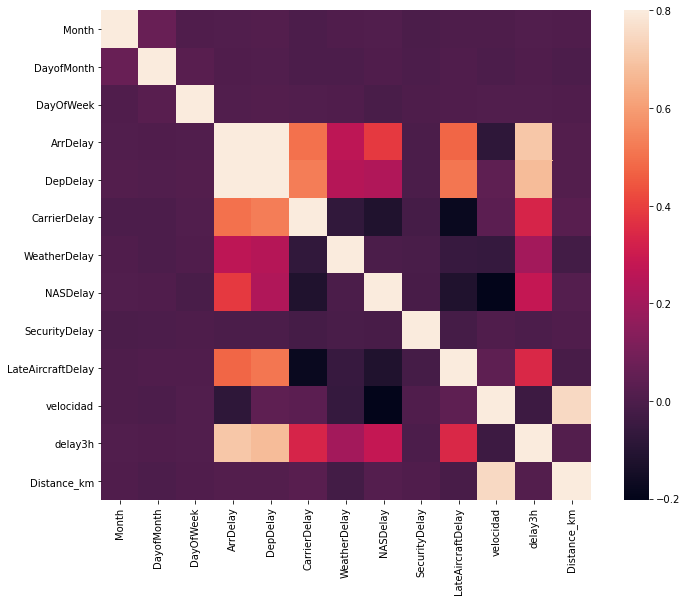

In [12]:
# the correlation graph show us how all variables are related between them
corrmat = df_mini.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

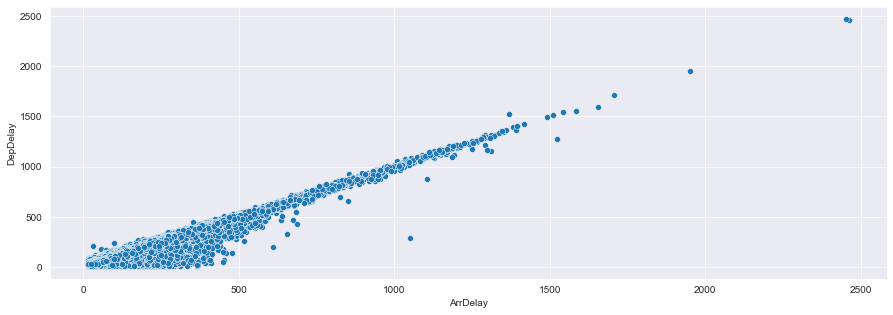

In [13]:
# The distribution of departure and arrivals delay shows a positive relation between both variables.
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(data=df_mini, x="ArrDelay", y="DepDelay");

In [14]:
# Train and test exercise
train, test = train_test_split(df_mini, test_size=0.33)
print("sample size for train (67%): ", len(train))
print("sample size for test (33%): ", len(test))
print("Both samples have the correct distribution")

sample size for train (67%):  835816
sample size for test (33%):  411672
Both samples have the correct distribution


In [15]:
round(train.describe(),2)

,Month,DayofMonth,DayOfWeek,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,velocidad,Distance_km
count,835816.00,835816.00,835816.00,835816.00,835816.00,835816.00,835816.00,835816.00,835816.00,835816.00,835816.00,835816.00
mean,6.07,15.73,3.98,63.31,59.69,19.17,3.70,15.02,0.09,25.33,454.98,460.74
std,3.51,8.79,1.99,60.53,59.63,43.30,21.54,33.76,2.03,42.02,146.08,347.62
min,1.00,1.00,1.00,15.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,6.84
25%,3.00,8.00,2.00,26.00,24.00,0.00,0.00,0.00,0.00,0.00,360.00,207.54
50%,6.00,16.00,4.00,43.00,41.00,2.00,0.00,2.00,0.00,8.00,480.00,369.72
75%,9.00,23.00,6.00,79.00,75.00,21.00,0.00,15.00,0.00,33.00,540.00,603.97
max,12.00,31.00,7.00,2461.00,2457.00,1951.00,1352.00,1357.00,357.00,1254.00,1980.00,3083.24


In [16]:
round(test.describe(),2)

,Month,DayofMonth,DayOfWeek,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,velocidad,Distance_km
count,411672.00,411672.00,411672.00,411672.00,411672.00,411672.00,411672.00,411672.00,411672.00,411672.00,411672.00,411672.00
mean,6.06,15.72,3.98,63.26,59.65,19.20,3.72,15.02,0.09,25.24,455.06,460.93
std,3.51,8.80,1.99,61.21,60.35,44.04,21.40,33.98,2.01,42.13,145.91,347.49
min,1.00,1.00,1.00,15.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,14.91
25%,3.00,8.00,2.00,26.00,24.00,0.00,0.00,0.00,0.00,0.00,360.00,207.54
50%,6.00,16.00,4.00,43.00,41.00,2.00,0.00,2.00,0.00,8.00,480.00,369.72
75%,9.00,23.00,6.00,79.00,75.00,21.00,0.00,15.00,0.00,33.00,540.00,603.97
max,12.00,31.00,7.00,2453.00,2467.00,2436.00,1153.00,1289.00,392.00,1316.00,1200.00,3083.24


##### Descriptive statistics are similar in both samples
##### We can see it graphically:

Text(0.5, 1.0, 'Train sample')

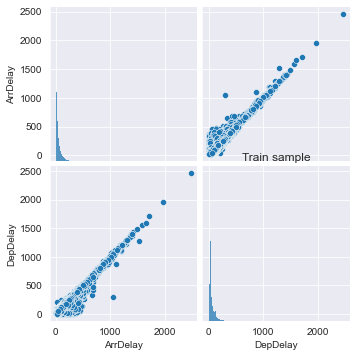

In [17]:
sns.pairplot(train[['ArrDelay','DepDelay']])
plt.title('Train sample')

Text(0.5, 1.0, 'Test sample')

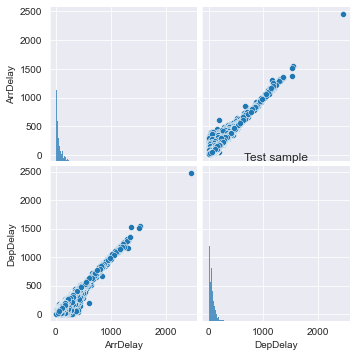

In [19]:
sns.pairplot(test[['ArrDelay','DepDelay']])
plt.title('Test sample')

## Nivell 2. Exercici 2
### Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

In [20]:
# First, we organize according to the type of variable

numeric_var = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'velocidad', 'Distance_km']
binomial_var = ['delay3h'] 
# Variable delay3h was created because if the delay is more than 3hours, the passenger is entitled to compensation
ordinal_var = ['Month', 'DayofMonth', 'DayOfWeek','dist_group']
# dist_group was created with 3 categories: A (0-1500Km); B (1500-3000Km); C(>3000Km)
# In case of compensation for delays, it has to take into account the distance: A (250€); B (400€) and C (600€)
nominal_var = ['UniqueCarrier', 'Origin', 'Dest']

In [21]:
# Standarizing numeric variables with StandardScaler

#train
ss = StandardScaler()
train[numeric_var] = ss.fit_transform(train[numeric_var])
train[numeric_var]

<ipython-input-21-c92bb6679afc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[numeric_var] = ss.fit_transform(train[numeric_var])
C:\Users\nuyan\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,velocidad,Distance_km
659470,-0.599855,-0.464413,-0.234913,-0.171613,-0.445003,-0.044543,-0.174361,0.581998,-0.086664
808945,-0.236378,-0.279943,0.319361,-0.171613,-0.267269,-0.044543,-0.364767,1.403472,1.466695
1088655,-0.170291,-0.732732,-0.258007,-0.171613,0.651022,-0.044543,-0.412368,-1.060948,-0.612196
618558,-0.550290,-0.514722,-0.442765,-0.171613,-0.415381,-0.044543,0.087447,-1.060948,-0.857087
947117,1.316661,1.296432,2.721211,-0.171613,-0.267269,-0.044543,-0.602774,-1.471685,-0.878537
...,...,...,...,...,...,...,...,...,...
859165,0.374925,0.508245,-0.442765,-0.171613,2.102516,-0.044543,-0.602774,-2.293158,-1.171691
709480,1.994051,1.984000,-0.442765,-0.171613,-0.267269,-0.044543,3.633757,-0.650211,-0.871387
237666,-0.715507,-0.347023,-0.442765,-0.171613,-0.445003,-0.044543,-0.126759,0.992735,0.422780
649241,-0.698985,-0.850122,-0.234913,-0.171613,-0.089535,-0.044543,-0.602774,0.992735,1.661535


In [22]:
#test
ss = StandardScaler()
test[numeric_var] = ss.fit_transform(test[numeric_var])
test[numeric_var]

<ipython-input-22-b5235e63ecfb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[numeric_var] = ss.fit_transform(test[numeric_var])
C:\Users\nuyan\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,velocidad,Distance_km
753014,0.355168,0.386984,-0.435835,-0.173757,-0.383112,-0.044604,1.370923,0.582137,0.186336
567441,4.814967,5.275090,-0.435835,-0.173757,0.999884,-0.044604,6.734692,1.815807,1.264618
39321,-0.674016,-0.739766,0.063689,-0.173757,-0.441963,-0.044604,-0.598957,-0.651532,-0.795383
1023971,-0.674016,-0.822615,-0.208779,-0.173757,-0.088857,-0.044604,-0.598957,-0.240309,-0.448473
415139,2.005130,2.060539,-0.435835,-0.173757,-0.235984,-0.044604,3.649338,0.170914,-0.033612
...,...,...,...,...,...,...,...,...,...
672514,0.877928,0.933789,-0.367718,-0.173757,-0.412537,-0.044604,2.082928,0.582137,0.427742
424108,-0.772034,-0.839185,-0.345013,-0.173757,-0.235984,-0.044604,-0.480290,-0.651532,-0.525366
620221,-0.298282,-0.424939,-0.435835,-0.173757,0.882182,-0.044604,-0.598957,0.170914,0.422378
692630,-0.396300,-0.540928,0.177217,-0.173757,-0.088857,-0.044604,-0.598957,0.170914,-0.112293


In [23]:
# Transform ordinal variables with OrdinalEncoder

#train
enc = OrdinalEncoder()
train[ordinal_var] = enc.fit_transform(train[ordinal_var])
train[ordinal_var]

<ipython-input-23-dca1039b25a6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[ordinal_var] = enc.fit_transform(train[ordinal_var])
C:\Users\nuyan\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,Month,DayofMonth,DayOfWeek,dist_group
659470,5.0,28.0,6.0,0.0
808945,6.0,2.0,3.0,0.0
1088655,10.0,13.0,4.0,0.0
618558,5.0,23.0,1.0,0.0
947117,8.0,14.0,0.0,0.0
...,...,...,...,...
859165,7.0,7.0,4.0,0.0
709480,6.0,1.0,2.0,0.0
237666,1.0,18.0,1.0,0.0
649241,5.0,27.0,5.0,0.0


In [24]:
#test
enc = OrdinalEncoder()
test[ordinal_var] = enc.fit_transform(test[ordinal_var])
test[ordinal_var]

<ipython-input-24-5ce90028079a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[ordinal_var] = enc.fit_transform(test[ordinal_var])
C:\Users\nuyan\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,Month,DayofMonth,DayOfWeek,dist_group
753014,6.0,19.0,6.0,0.0
567441,4.0,28.0,3.0,0.0
39321,0.0,21.0,1.0,0.0
1023971,9.0,6.0,1.0,0.0
415139,3.0,26.0,6.0,0.0
...,...,...,...,...
672514,5.0,18.0,3.0,0.0
424108,3.0,24.0,4.0,0.0
620221,5.0,27.0,5.0,0.0
692630,5.0,7.0,6.0,0.0


In [25]:
#train
enc = OrdinalEncoder()
train[ordinal_var] = enc.fit_transform(train[ordinal_var])
train[ordinal_var]

<ipython-input-25-b7cccbb27d05>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[ordinal_var] = enc.fit_transform(train[ordinal_var])
C:\Users\nuyan\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,Month,DayofMonth,DayOfWeek,dist_group
659470,5.0,28.0,6.0,0.0
808945,6.0,2.0,3.0,0.0
1088655,10.0,13.0,4.0,0.0
618558,5.0,23.0,1.0,0.0
947117,8.0,14.0,0.0,0.0
...,...,...,...,...
859165,7.0,7.0,4.0,0.0
709480,6.0,1.0,2.0,0.0
237666,1.0,18.0,1.0,0.0
649241,5.0,27.0,5.0,0.0


In [26]:
# test
enc = OrdinalEncoder()
test[ordinal_var] = enc.fit_transform(test[ordinal_var])
test[ordinal_var]

<ipython-input-26-38c019403d72>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[ordinal_var] = enc.fit_transform(test[ordinal_var])
C:\Users\nuyan\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,Month,DayofMonth,DayOfWeek,dist_group
753014,6.0,19.0,6.0,0.0
567441,4.0,28.0,3.0,0.0
39321,0.0,21.0,1.0,0.0
1023971,9.0,6.0,1.0,0.0
415139,3.0,26.0,6.0,0.0
...,...,...,...,...
672514,5.0,18.0,3.0,0.0
424108,3.0,24.0,4.0,0.0
620221,5.0,27.0,5.0,0.0
692630,5.0,7.0,6.0,0.0


#####  Transforming nominal variables with OneHotEncoder:
#####  Every time I tried to do nominal transformation, the screen suddenly shuts off 
##### So, I will continue with the data I already have.

In [29]:
#concatenate train transformed dataframes

df_1 = train[numeric_var]
df_2 = train[ordinal_var]

frames = [df_1, df_2]
newdf_train = pd.concat(frames, sort=False, axis = 1)
newdf_train

,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,velocidad,Distance_km,Month,DayofMonth,DayOfWeek,dist_group
659470,-0.599855,-0.464413,-0.234913,-0.171613,-0.445003,-0.044543,-0.174361,0.581998,-0.086664,5.0,28.0,6.0,0.0
808945,-0.236378,-0.279943,0.319361,-0.171613,-0.267269,-0.044543,-0.364767,1.403472,1.466695,6.0,2.0,3.0,0.0
1088655,-0.170291,-0.732732,-0.258007,-0.171613,0.651022,-0.044543,-0.412368,-1.060948,-0.612196,10.0,13.0,4.0,0.0
618558,-0.550290,-0.514722,-0.442765,-0.171613,-0.415381,-0.044543,0.087447,-1.060948,-0.857087,5.0,23.0,1.0,0.0
947117,1.316661,1.296432,2.721211,-0.171613,-0.267269,-0.044543,-0.602774,-1.471685,-0.878537,8.0,14.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859165,0.374925,0.508245,-0.442765,-0.171613,2.102516,-0.044543,-0.602774,-2.293158,-1.171691,7.0,7.0,4.0,0.0
709480,1.994051,1.984000,-0.442765,-0.171613,-0.267269,-0.044543,3.633757,-0.650211,-0.871387,6.0,1.0,2.0,0.0
237666,-0.715507,-0.347023,-0.442765,-0.171613,-0.445003,-0.044543,-0.126759,0.992735,0.422780,1.0,18.0,1.0,0.0
649241,-0.698985,-0.850122,-0.234913,-0.171613,-0.089535,-0.044543,-0.602774,0.992735,1.661535,5.0,27.0,5.0,0.0


In [30]:
#concatenate test transformed dataframes

df_3 = test[numeric_var]
df_4 = test[ordinal_var]

frames = [df_3, df_4]
newdf_test = pd.concat(frames, sort=False, axis = 1)
newdf_test

,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,velocidad,Distance_km,Month,DayofMonth,DayOfWeek,dist_group
753014,0.355168,0.386984,-0.435835,-0.173757,-0.383112,-0.044604,1.370923,0.582137,0.186336,6.0,19.0,6.0,0.0
567441,4.814967,5.275090,-0.435835,-0.173757,0.999884,-0.044604,6.734692,1.815807,1.264618,4.0,28.0,3.0,0.0
39321,-0.674016,-0.739766,0.063689,-0.173757,-0.441963,-0.044604,-0.598957,-0.651532,-0.795383,0.0,21.0,1.0,0.0
1023971,-0.674016,-0.822615,-0.208779,-0.173757,-0.088857,-0.044604,-0.598957,-0.240309,-0.448473,9.0,6.0,1.0,0.0
415139,2.005130,2.060539,-0.435835,-0.173757,-0.235984,-0.044604,3.649338,0.170914,-0.033612,3.0,26.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
672514,0.877928,0.933789,-0.367718,-0.173757,-0.412537,-0.044604,2.082928,0.582137,0.427742,5.0,18.0,3.0,0.0
424108,-0.772034,-0.839185,-0.345013,-0.173757,-0.235984,-0.044604,-0.480290,-0.651532,-0.525366,3.0,24.0,4.0,0.0
620221,-0.298282,-0.424939,-0.435835,-0.173757,0.882182,-0.044604,-0.598957,0.170914,0.422378,5.0,27.0,5.0,0.0
692630,-0.396300,-0.540928,0.177217,-0.173757,-0.088857,-0.044604,-0.598957,0.170914,-0.112293,5.0,7.0,6.0,0.0


## Nivell 3. Exercici 3
### Resumeix les noves columnes generades de manera estadística i gràfica

In [70]:
round(newdf_train.describe().transpose(),3)

,count,mean,std,min,25%,50%,75%,max
ArrDelay,835816.0,0.000,1.000,-0.798,-0.616,-0.336,0.259,39.614
DepDelay,835816.0,-0.000,1.000,-0.900,-0.599,-0.313,0.257,40.203
CarrierDelay,835816.0,0.000,1.000,-0.443,-0.443,-0.397,0.042,44.615
WeatherDelay,835816.0,-0.000,1.000,-0.172,-0.172,-0.172,-0.172,62.595
NASDelay,835816.0,0.000,1.000,-0.445,-0.445,-0.386,-0.001,39.752
SecurityDelay,835816.0,-0.000,1.000,-0.045,-0.045,-0.045,-0.045,175.848
LateAircraftDelay,835816.0,-0.000,1.000,-0.603,-0.603,-0.412,0.183,29.243
velocidad,835816.0,0.000,1.000,-3.115,-0.650,0.171,0.582,10.440
Distance_km,835816.0,-0.000,1.000,-1.306,-0.728,-0.262,0.412,7.544
Month,835816.0,5.067,3.510,0.000,2.000,5.000,8.000,11.000


In [71]:
round(newdf_test.describe().transpose(),3)

,count,mean,std,min,25%,50%,75%,max
ArrDelay,411672.0,-0.000,1.000,-0.788,-0.609,-0.331,0.257,39.039
DepDelay,411672.0,-0.000,1.000,-0.889,-0.591,-0.309,0.254,39.890
CarrierDelay,411672.0,-0.000,1.000,-0.436,-0.436,-0.390,0.041,54.875
WeatherDelay,411672.0,-0.000,1.000,-0.174,-0.174,-0.174,-0.174,53.714
NASDelay,411672.0,0.000,1.000,-0.442,-0.442,-0.383,-0.001,37.487
SecurityDelay,411672.0,0.000,1.000,-0.045,-0.045,-0.045,-0.045,195.119
LateAircraftDelay,411672.0,-0.000,1.000,-0.599,-0.599,-0.409,0.184,30.634
velocidad,411672.0,0.000,1.000,-3.119,-0.652,0.171,0.582,5.106
Distance_km,411672.0,-0.000,1.000,-1.284,-0.729,-0.263,0.412,7.547
Month,411672.0,5.062,3.506,0.000,2.000,5.000,8.000,11.000


##### All the numeric variables have the value of 1 as standard deviation and 0 as a mean, in both, the train and test set.
##### As a result of the standarization processing.
##### The rest of variables are close, train and test, in values 

In [65]:
def comparison(newdf_train, newdf_test, variable):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12.5, 2.5)
    fig.suptitle("Comparison train and test data: " + variable)
    sns.kdeplot(data=newdf_train, x=variable, ax=ax1).set_ylabel("Train distribution")
    sns.kdeplot(data=newdf_test, x=variable, ax=ax2).set_ylabel("Test distribution")


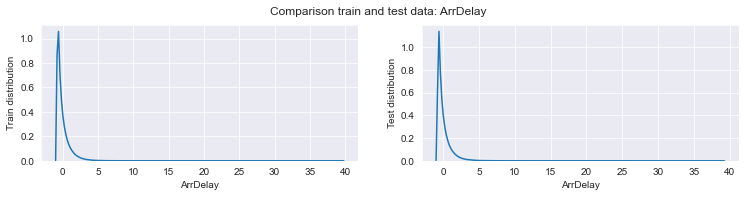

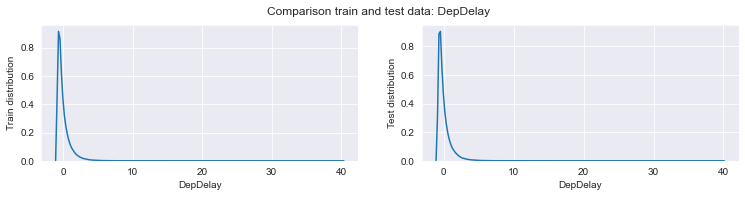

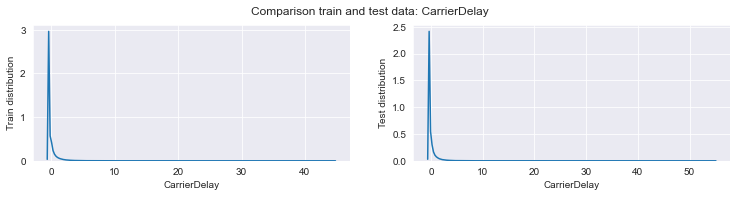

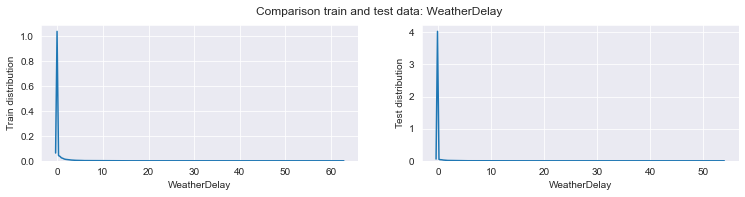

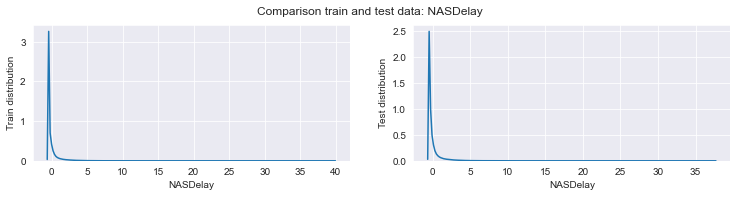

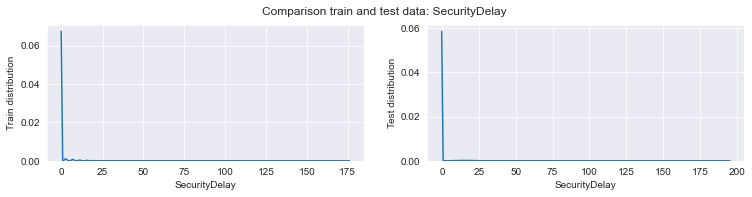

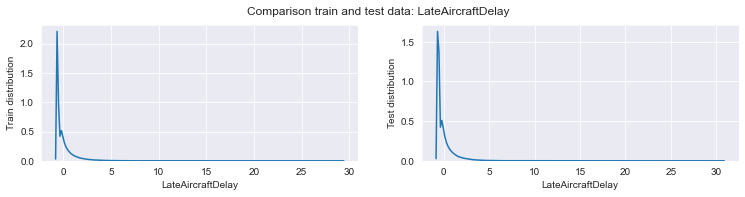

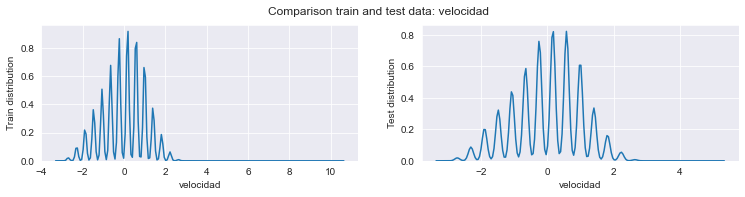

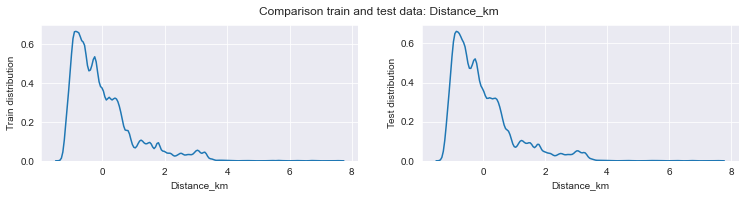

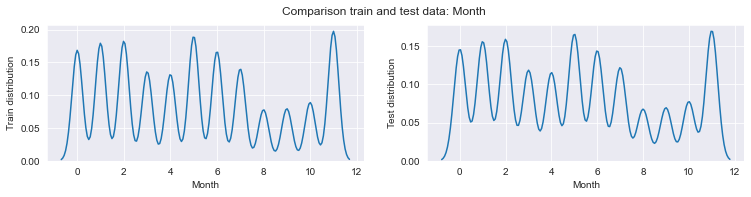

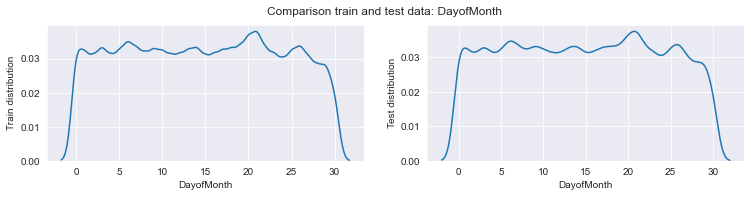

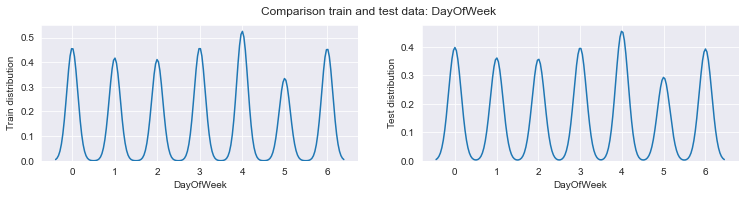

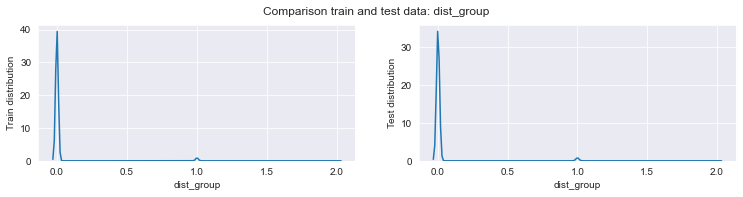

In [68]:
comparison(newdf_train, newdf_test, "ArrDelay")
comparison(newdf_train, newdf_test, "DepDelay")
comparison(newdf_train, newdf_test, "CarrierDelay")
comparison(newdf_train, newdf_test, "WeatherDelay")
comparison(newdf_train, newdf_test, "NASDelay")
comparison(newdf_train, newdf_test, "SecurityDelay")
comparison(newdf_train, newdf_test, "LateAircraftDelay")
comparison(newdf_train, newdf_test, "velocidad")
comparison(newdf_train, newdf_test, "Distance_km")
comparison(newdf_train, newdf_test, "Month")
comparison(newdf_train, newdf_test, "DayofMonth")
comparison(newdf_train, newdf_test, "DayOfWeek")
comparison(newdf_train, newdf_test, "dist_group")

In [69]:
plt.savefig("train&test.png")

<Figure size 432x288 with 0 Axes>